In [7]:
import requests
import os
import pandas as pd
import folium
import plotly.express as px
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import calendar
print(folium.__version__)


0.14.0


In [8]:
def fast_scandir(dirname):
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders

subfolders = fast_scandir(r'./Datasets')

In [9]:
all_street_df = []
all_ss_df = []
all_outcome_df = []
for i in range(4, len(subfolders)):
    street_file_name =  [ file for file in os.listdir(subfolders[i]) if "street" in file]
    ss_file_name = [ file for file in os.listdir(subfolders[i]) if "search" in file]
    outcome_file_name = [ file for file in os.listdir(subfolders[i]) if "outcome" in file]
    if len(street_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], street_file_name[0]))
        all_street_df.append(df)
    elif len(ss_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], ss_file_name[0]))
        all_ss_df.append(df)
    if len(outcome_file_name) > 0:
        df = pd.read_csv(os.path.join(subfolders[i], outcome_file_name[0]))
        all_outcome_df.append(df)

In [10]:
df = pd.concat(all_street_df, ignore_index=True)
df = df.drop(columns=['Context'])

# Filter the DataFrame to only include rows where the LSOA name is 'Barnet' and the Crime type is 'Burglary'
filtered_df = df[(df['LSOA name'].str.contains('Barnet')) & (df['Crime type'].str.contains('Burglary'))]

filtered_df['Month']= pd.to_datetime(filtered_df['Month'])
filtered_df['Year'] = filtered_df['Month'].dt.year
filtered_df = filtered_df.rename(columns={'Month': 'Date'})
filtered_df['Month'] = filtered_df['Date'].dt.month

# create a new column named Month name and convert the Month num column to the month name
filtered_df['Month name'] = filtered_df['Month'].apply(lambda x: calendar.month_abbr[x])

filtered_df.head()

C:\Users\Rafi\AppData\Local\Temp\ipykernel_45128\3335531573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month']= pd.to_datetime(filtered_df['Month'])
C:\Users\Rafi\AppData\Local\Temp\ipykernel_45128\3335531573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Month'].dt.year


,Crime ID,Date,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,Month,Month name
2546,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar
2547,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar
2548,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.217135,51.653172,On or near Argyle Road,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar
2549,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar
2550,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.210451,51.657719,On or near Wentworth Road,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar


In [11]:
locations = [
    "High Barnet",
    "Underhill",
    "Barnet Vale",
    "East Barnet",
    "Friern Barnet",
    "Woodhouse",
    "Whetstone",
    "Brunswick Park",
    "Totteridge and Woodside",
    "Mill Hill",
    "Cricklewood",
    "Edgwarebury",
    "Burnt Oak",
    "Edgware",
    "Colindale South",
    "West Hendon",
    "Colindale North",
    "Hendon",
    "West Finchley",
    "East Finchley",
    "Garden Suburb",
    "Finchley Church End",
    "Golders Green",
    "Childs Hill"
]

In [12]:
response = requests.get("https://data.police.uk/api/metropolitan/neighbourhoods")
print(response.status_code)

200


In [13]:
print(response.json())

[{'id': 'E05009317', 'name': 'Bethnal Green East'}, {'id': 'E05009318', 'name': 'Blackwall and Cubitt Town'}, {'id': 'E05009319', 'name': 'Bow East'}, {'id': 'E05009320', 'name': 'Bow West'}, {'id': 'E05009321', 'name': 'Bromley North'}, {'id': 'E05009322', 'name': 'Bromley South'}, {'id': 'E05009323', 'name': 'Canary Wharf'}, {'id': 'E05009324', 'name': 'Island Gardens'}, {'id': 'E05009325', 'name': 'Lansbury'}, {'id': 'E05009326', 'name': 'Limehouse'}, {'id': 'E05009327', 'name': 'Mile End'}, {'id': 'E05009328', 'name': 'Poplar'}, {'id': 'E05009329', 'name': "St Dunstan's"}, {'id': 'E05009330', 'name': "St Katharine's and Wapping"}, {'id': 'E05009331', 'name': 'Bethnal Green West'}, {'id': 'E05009332', 'name': 'Shadwell'}, {'id': 'E05009333', 'name': 'Spitalfields and Banglatown'}, {'id': 'E05009334', 'name': 'Stepney Green'}, {'id': 'E05009335', 'name': 'Weavers'}, {'id': 'E05009336', 'name': 'Whitechapel'}, {'id': 'E05009367', 'name': 'Brownswood'}, {'id': 'E05009368', 'name': 'Caz

In [14]:
barnet_ids = []

for d in response.json():
    if d['name'] in locations:
        barnet_ids.append(d["id"])

In [15]:
print(barnet_ids)
len(barnet_ids)

['E05013545', 'E05013628', 'E05013629', 'E05013630', 'E05013631', 'E05013632', 'E05013633', 'E05013634', 'E05013635', 'E05013636', 'E05013637', 'E05013638', 'E05013639', 'E05013640', 'E05013641', 'E05013642', 'E05013643', 'E05013644', 'E05013645', 'E05013646', 'E05013647', 'E05013648', 'E05013649', 'E05013650', 'E05013651']


25

In [16]:
# create a dataframe with the id and name of each neighbourhood
# in the Barnet borough. Set id as the index.
response = requests.get("https://data.police.uk/api/metropolitan/neighbourhoods")
barnet_df = pd.DataFrame(response.json())
barnet_df = barnet_df[barnet_df['name'].isin(locations)]
barnet_df = barnet_df.set_index('id')
barnet_df.head()

,name
id,
E05013545,Edgware
E05013628,Barnet Vale
E05013629,Brunswick Park
E05013630,Burnt Oak
E05013631,Childs Hill


In [17]:
def get_bound(x):
    bound = requests.get(f"https://data.police.uk/api/metropolitan/{x}/boundary").json()
    bound = [(float(d["latitude"]), float(d["longitude"])) for d in bound]
    return bound

barnet_df['boundaries'] = barnet_df.apply(lambda x: get_bound(x.name), axis=1)

barnet_df.head()

,name,boundaries
id,,
E05013545,Edgware,"[(51.612277994295, -0.28101069219112), (51.611..."
E05013628,Barnet Vale,"[(51.634276016337, -0.17977180627771), (51.634..."
E05013629,Brunswick Park,"[(51.627511902482, -0.15625171052302), (51.627..."
E05013630,Burnt Oak,"[(51.597724278003, -0.25291781885811), (51.597..."
E05013631,Childs Hill,"[(51.559882977663, -0.19691984536718), (51.559..."


In [18]:
m = folium.Map(location=[51.65, -0.2], zoom_start=10, tiles="CartoDB positron")
m

In [19]:
def add_wards_to_map(x):
    folium.Polygon(locations=x, color='blue', 
                   fill=True, fill_color='orange', 
                   weight=2).add_to(m)

barnet_df['boundaries'].apply(add_wards_to_map)
m

In [20]:
filtered_df = filtered_df.reset_index(drop=True)

In [21]:
# get the heatmap of the burglary crimes in Barnet for each ward

from folium.plugins import HeatMap

m = folium.Map(location=[51.6, -0.2], zoom_start=11)

def add_wards_to_map(x):
    folium.Polygon(locations=x, fill=True, color='black', fill_color='black').add_to(m)

barnet_df['boundaries'].apply(add_wards_to_map)

HeatMap(filtered_df[['Latitude', 'Longitude']].values.tolist(), radius=8, max_zoom=13).add_to(m)

m

In [23]:
# assign each crime from the filtered_df to a ward

def get_ward(x):

    for i in range(len(barnet_df)):
        if x['Latitude'] >= min([d[0] for d in barnet_df['boundaries'][i]]) and x['Latitude'] <= max([d[0] for d in barnet_df['boundaries'][i]]) and x['Longitude'] >= min([d[1] for d in barnet_df['boundaries'][i]]) and x['Longitude'] <= max([d[1] for d in barnet_df['boundaries'][i]]):
            return barnet_df['name'][i]
        
filtered_df['Ward'] = filtered_df.apply(lambda x: get_ward(x), axis=1)


filtered_df.head()

,Crime ID,Date,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,Month,Month name,Ward
0,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar,High Barnet
1,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar,High Barnet
2,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.217135,51.653172,On or near Argyle Road,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar,High Barnet
3,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.211600,51.657530,On or near Cecil Court,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar,High Barnet
4,NaN,2011-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.210451,51.657719,On or near Wentworth Road,E01000249,Barnet 001B,Burglary,NaN,2011,3,Mar,High Barnet


In [24]:
# add a new column number of crimes to barnet_df, set the value to 0, and then increment the value by 1 for each crime in filtered_df that belongs to the ward

barnet_df['number of crimes'] = 0

for i in range(len(filtered_df)):
    barnet_df.loc[barnet_df['name'] == filtered_df['Ward'][i], 'number of crimes'] += 1

barnet_df.head()

,name,boundaries,number of crimes
id,,,
E05013545,Edgware,"[(51.612277994295, -0.28101069219112), (51.611...",1661
E05013628,Barnet Vale,"[(51.634276016337, -0.17977180627771), (51.634...",1150
E05013629,Brunswick Park,"[(51.627511902482, -0.15625171052302), (51.627...",1122
E05013630,Burnt Oak,"[(51.597724278003, -0.25291781885811), (51.597...",974
E05013631,Childs Hill,"[(51.559882977663, -0.19691984536718), (51.559...",1932


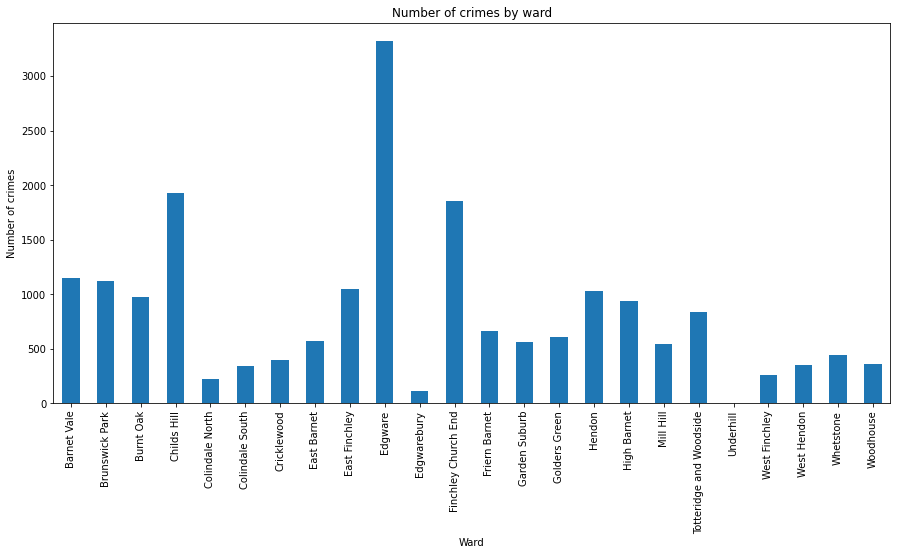

In [25]:
# plot the number of crimes by each ward in a bar chart
fig, ax = plt.subplots(figsize=(15,7))

barnet_df.groupby(['name'])['number of crimes'].sum().plot(ax=ax, kind='bar')

plt.title('Number of crimes by ward')
plt.xlabel('Ward')
plt.ylabel('Number of crimes')

plt.show()